In [1]:
#Loading in libraries
pacman::p_load(tidyverse, dplyr, ggplot2, gganimate, ggthemes, RColorBrewer, fastDummies, janitor, cowplot, MLmetrics,
               repr, BBmisc, devtools, reticulate, Rcpp, tictoc, data.table, corrplot, ggrepel, tensorflow, keras, bsts)

#Loading in train data
df_train <- read.csv("../input/tabular-playground-series-mar-2022/train.csv")

**Loading in h2o4gpu package**

In [2]:
reticulate::py_discover_config("h2o4gpu")
reticulate::conda_version(conda = "auto")

python:         /miniconda/envs/r-reticulate/bin/python
libpython:      /miniconda/envs/r-reticulate/lib/libpython3.7m.so
pythonhome:     /miniconda/envs/r-reticulate:/miniconda/envs/r-reticulate
version:        3.7.11 (default, Jul 27 2021, 14:32:16)  [GCC 7.5.0]
numpy:          /miniconda/envs/r-reticulate/lib/python3.7/site-packages/numpy
numpy_version:  1.18.5
h2o4gpu:        [NOT FOUND]

python versions found: 
 /miniconda/envs/r-reticulate/bin/python
 /usr/bin/python3
 /usr/bin/python

[1] "conda 4.10.3"

In [3]:
#Loading in h2o4gpu package
devtools::install_github("h2oai/h2o4gpu", subdir = "src/interface_r")

library(h2o4gpu)

#Installing python module for h2o4gpu
py_install("h2o4gpu",
          pip = TRUE)


'/usr/bin/git' clone --depth 1 --no-hardlinks --recurse-submodules https://github.com/h2oai/cub /tmp/RtmphIqbXh/remotesed9074d6/h2oai-h2o4gpu-aaf7795/src/interface_r/../../cub

'/usr/bin/git' clone --depth 1 --no-hardlinks --recurse-submodules https://github.com/h2oai/xgboost /tmp/RtmphIqbXh/remotesed9074d6/h2oai-h2o4gpu-aaf7795/src/interface_r/../../xgboost

'/usr/bin/git' clone --depth 1 --no-hardlinks --recurse-submodules https://github.com/h2oai/py3nvml /tmp/RtmphIqbXh/remotesed9074d6/h2oai-h2o4gpu-aaf7795/src/interface_r/../../py3nvml

'/usr/bin/git' clone --depth 1 --no-hardlinks --recurse-submodules https://github.com/h2oai/scikit-learn.git /tmp/RtmphIqbXh/remotesed9074d6/h2oai-h2o4gpu-aaf7795/src/interface_r/../../scikit-learn

'/usr/bin/git' clone --depth 1 --no-hardlinks --recurse-submodules https://github.com/google/googletest.git /tmp/RtmphIqbXh/remotesed9074d6/h2oai-h2o4gpu-aaf7795/src/interface_r/../../tests/googletest

'/usr/bin/git' clone --depth 1 --no-hardlinks --rec

Rcpp       (1.0.7 -> 1.0.8.3) [CRAN]
withr      (2.4.2 -> 2.5.0  ) [CRAN]
jsonlite   (1.7.2 -> 1.8.0  ) [CRAN]
reticulate (1.22  -> 1.24   ) [CRAN]
magrittr   (2.0.1 -> 2.0.3  ) [CRAN]


Installing 5 packages: Rcpp, withr, jsonlite, reticulate, magrittr

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘Rcpp’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘jsonlite’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘magrittr’ had non-zero exit status”


✔  checking for file ‘/tmp/RtmphIqbXh/remotesed9074d6/h2oai-h2o4gpu-aaf7795/src/interface_r/DESCRIPTION’
─  preparing ‘h2o4gpu’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘h2o4gpu_0.3.3.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘h2o4gpu’


The following object is masked from ‘package:keras’:

    fit


The following object is masked from ‘package:base’:

    transform




# Data exploration

In [4]:
#Checking the number of rows
nrow(df_train)

[1] 848835

In [5]:
head(df_train)

row_id time                x y direction congestion
1 0      1991-04-01 00:00:00 0 0 EB        70        
2 1      1991-04-01 00:00:00 0 0 NB        49        
3 2      1991-04-01 00:00:00 0 0 SB        24        
4 3      1991-04-01 00:00:00 0 1 EB        18        
5 4      1991-04-01 00:00:00 0 1 NB        60        
6 5      1991-04-01 00:00:00 0 1 SB        58

In [6]:
prop.table(table(df_train$direction, df_train$x))
prop.table(table(df_train$direction, df_train$y))

    
              0          1          2
  EB 0.06153846 0.06153846 0.06153846
  NB 0.06153846 0.06153846 0.06153846
  NE 0.01538462 0.04615385 0.04615385
  NW 0.00000000 0.00000000 0.03076923
  SB 0.06153846 0.06153846 0.06153846
  SE 0.00000000 0.00000000 0.03076923
  SW 0.01538462 0.04615385 0.04615385
  WB 0.04615385 0.06153846 0.06153846

    
              0          1          2          3
  EB 0.04615385 0.04615385 0.04615385 0.04615385
  NB 0.04615385 0.04615385 0.04615385 0.04615385
  NE 0.01538462 0.01538462 0.03076923 0.04615385
  NW 0.00000000 0.01538462 0.01538462 0.00000000
  SB 0.04615385 0.04615385 0.04615385 0.04615385
  SE 0.00000000 0.01538462 0.01538462 0.00000000
  SW 0.01538462 0.01538462 0.03076923 0.04615385
  WB 0.03076923 0.04615385 0.04615385 0.04615385

Directions are dependent on coordinates:

* For **x = 0** and **x = 1** there are no NW and SE directions.
* For **y = 0** and **y = 3** there are also no NW and SE directions.

In [7]:
#Creating  time grouping variables
df_train <- df_train %>%
  cbind("minute" = as.numeric(format.Date(df_train$time, "%M"))) %>%
  cbind("hour" = as.numeric(format.Date(df_train$time, "%H"))) %>%
  cbind("day" = as.numeric(format.Date(df_train$time, "%d"))) %>%
  cbind("month" = as.numeric(format.Date(df_train$time, "%m"))) %>%
  cbind("weekday" = weekdays(as.Date(df_train$time, "%Y-%m-%d %H:%M:%S")))

df_train <- df_train %>%
   mutate(minute = factor(minute, levels = c("0", "20", "40")),
          hour = factor(hour, levels = c(as.character(0:23))),
          day = factor(day, levels = c(as.character(1:31))),
          month = factor(month, levels = c(as.character(1:12))),
          weekday = factor(weekday, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")))

grouping_plotter(dataset, group_list, groupby_time, groupdistinct) - function that allows the choice and grouping of plotted variables:

* dataset - data.frame object
* group_list - list of vectors with variable names (e.g. for this competition):

1. x - whether to plot congestion based on possible east-west midpoint coordinate of the roadway - x = (0,1,2)
2. y - whether to plot congestion based on possible north-south midpoint coordinate of the roadway - y = (0,1,2,3)
3. direction - whether to plot congestion based on the where the travel destination is - direction = ("EB", "NB", "SB", "WB", "NE", "SW", "NW", "SE")

* groupby_time - grouping based on the time of the year e.g.:
1. hour - mean of each hour throughout the day
2. day - mean of each day throughout  '30' / '31' day months in the series
3. weekday - mean of each 'day-of-the-week' throughout the series
4. month - mean of each month in a year

* groupdistinct -  which groups should be the focal point of the plot and what distinction to draw between them - first element decides the division between subgroups

In [8]:
grouping_plotter <- function(dataset, group_list, groupby_time, groupdistinct) {

    
#Filtering chosen variables  (since x and y are numerical and have the same values they will be filtered separately)
for(i in 1:3) {
    dataset <- dataset %>%
        filter(dataset[[i]] %in% unlist(group_list[i]))
}


#Grouping variables and extracting congestion values based on chosen period
dataset <- dataset %>%
    group_by_at(vars(all_of(groupby_time), all_of(groupdistinct))) %>%
    mutate(congestion_mean = mean(congestion))


#Creating a joint grouping variable
dataset <- dataset %>%
  unite(col = grouping, all_of(groupdistinct)) %>% 
  arrange(grouping) %>%
  mutate(grouping = as.factor(grouping))

dataset <- dataset %>%
  distinct(congestion_mean, .keep_all = TRUE)

#Changing the opacity of grid lines - 4th value is the 'alpha'
col_grid <- rgb(235, 235, 235, 190, maxColorValue = 255)
    
    
#Creating the plot
options(repr.plot.width = 12, repr.plot.height = 7)
timely_plot <- ggplot(dataset, aes(x = dataset[[which(colnames(dataset) == groupby_time)]], y = congestion_mean,
                                   color = grouping,  group = grouping)) +
    geom_line(size = 1.75) + theme_gdocs() + xlab(str_to_title(groupby_time)) +
    scale_color_brewer(palette = "Spectral") + theme(panel.grid.major = element_line(color = col_grid))
}

# What is being forecast?

In [9]:
#Loading in test data
df_test <- read.csv("../input/tabular-playground-series-mar-2022/test.csv")

In [10]:
nrow(df_test)

[1] 2340

Test data has only 2340 rows.

In [11]:
#Creating time grouping variables for test data
df_test <- df_test %>%
  cbind("minute" = as.numeric(format.Date(df_test$time, "%M"))) %>%
  cbind("hour" = as.numeric(format.Date(df_test$time, "%H"))) %>%
  cbind("day" = as.numeric(format.Date(df_test$time, "%d"))) %>%
  cbind("month" = as.numeric(format.Date(df_test$time, "%m"))) %>%
  cbind("weekday" = weekdays(as.Date(df_test$time, "%Y-%m-%d %H:%M:%S")))

df_test <- df_test %>%
    mutate(minute = factor(minute, levels = c("0", "20", "40")),
           hour = factor(hour, levels = c(as.character(0:23))),
           day = factor(day, levels = c(as.character(1:31))),
           month = factor(month, levels = c(as.character(1:12))),
           weekday = factor(weekday, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")))


Test data is the continuation of the last Monday from training data. It starts at 12 pm and ends at 23:40 30th of September 1991.

In [12]:
#How did the Monday start?
monday_traindata <- df_train[min(which(df_train$time == '1991-09-30 00:00:00')):nrow(df_train), -c(7:15)]

monday_traindata <- monday_traindata %>%
    mutate("hour" = as.POSIXct(monday_traindata$time))

monday_traindata <- monday_traindata %>%
    group_by(hour, direction) %>%
    mutate(congestion_mean = mean(congestion))

monday_traindata <- monday_traindata %>%
    mutate(direction = as.factor(direction))

monday_traindata <- monday_traindata %>%
  distinct(congestion_mean, .keep_all = TRUE)

Laying the gid animation groundwork, courtesy of [Felippe Gomes](https://www.kaggle.com/gomes555/starter-covid-19-in-brazil-by-day/)

In [13]:
library(magick)

Linking to ImageMagick 6.9.10.23
Enabled features: fontconfig, freetype, fftw, lcms, pango, webp, x11
Disabled features: cairo, ghostscript, heic, raw, rsvg

Using 2 threads



In [14]:
#Creating the plot
monday_plot <- ggplot(monday_traindata, aes(x = hour, y = congestion_mean,
                                   color = direction,  group = direction)) +
    geom_line(size = 1.5) + theme_gdocs() + xlab("Time of day") +
    scale_color_brewer(palette = "Spectral") +
theme(panel.grid.major = element_line(color = rgb(235, 235, 235, 190, maxColorValue = 255))) +
transition_reveal(hour) + ease_aes('linear') + ggtitle("Congestion on Monday")

#Animating
animate(monday_plot, height = 480, width = 720, renderer = magick_renderer(), fps = 10, end_pause = 80)

<img src="data:image/gif;base64,R0lGODlh0ALgAffeABAQEBERESsrK2RkZGZmZmdnZ2hoaGpqamtra2xsbG1tbW5ubm9vb3Bw
cHFxcXJycnNzc3R0dHV1dXZ2dnd3d3h4eHl5eXp6ent7e3x8fH19fX5+fn9/f9U+T9hLW/Rt
Q/2uYTKIvWbCpU2YxoCAgIGBgYKCgoODg4SEhIWFhYaGhoeHh4iIiImJiYqKiouLi4yMjI2N
jY6Ojo+Pj5CQkJGRkZKSkpOTk5SUlJWVlZaWlpeXl5iYmJmZmZqampubm5ycnJ2dnZ6enp+f
n6CgoKGhoaKioqOjo6SkpKWlpaampqenp6ioqKmpqaqqqqurq6ysrK2tra6urq+vr7CwsLGx
sbKysrOzs7S0tLW1tba2tre3t7i4uLm5ubq6uru7u7y8vL29vb6+vr+/v+aMluiUnfioj6vd
pLbisP7Ei/7gi+b1mP7Pof7Ztf7buv7oqv7tuoW42JXB3aPayaTbybvX6cDAwMHBwcLCwsPD
w8TExMXFxcbGxsfHx8jIyMnJycrKysvLy8zMzM3Nzc7Ozs/Pz9DQ0NHR0dLS0tPT09TU1NXV
1dbW1tfX19jY2NnZ2dra2tvb29zc3N3d3d7e3t/f3/TM0PXT1/ze1PbW2s3rycjp39Tt0PD5
wv/xyf/xzP7o0/3i2f/t2//239zx69Dk8Nbn8tfo8uDg4OHh4eLi4uPj4+Tk5OXl5ebm5ufn
5+jo6Onp6erq6uvr6+zs7O3t7e7u7u/v7/jg4/7u6eP04ez36u747e/47f/y5f/45f/27vn9
6Pr96v/67Or38/Dw8PHx8fLy8vPz8/T09PX19fb29vf39/309f/88/z+8/749vD2+vj4+Pn5
+fr6+vv7+/n8+P3++P7/+v7/+/z8/P39/f///f7+/v///wAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACH5BAQKAAAAIf8LTkVUU0NBUEUyLjADAQAAACwA
AAAA0ALgAQAI/gAFEBhIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqRJ
iAIQeFvJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKlTnAhUPp1KtarV
q1izat3KtavXr2CtRg1LtqzZs2jTql3Ltq3bnGPfyp1Lt67du3jz6v0Zd6/fv4ADCx5MuLDL
vlRTMaGBQcWPRW2JSEDrRYIESjC1WE6FNAcKw6BDix49F7HTblwoTIBBhAYFCUrOQlKhaKVk
yparwHSxufNn0sCDCx9e1XTTPhJo2GI5C4cEPmYVSSC0Ulkx3BlQdHP5SoIGCZyP/nomTr68
+fM6jS9VxkEFNZfGKLzQqe2pdOo96w/VP7OyEgmouOTFBEmAR59N46Gn4IIMEqeeUllI0AdM
VwiRzErMUCEDBjVk8d5KT2xwCw8TVBADIC0l00QKKTShDAlPsLRNGDc0NoUxLQ1ywwYc7PDI
Sj5YZpkyRkyGoYYceshSiCOWeOJMGW7Y4YfeMEmiiSjGVNkhFFjhUgw4YGHgkVIqCaKIVz7J
kixGoIDCEbYk6M0tS7xgQQpGuLLSHRIk0tIeEgjS4KCEFnrWg0nJIIEyNCHDggQ5QEGDBDFM
AyIGMahgxRTfIbLSMSxQIAQTJaxwQYzeaLODBDVAwYME/incslIYEpyQRBAXTDCJN49UIQEU
glRT5EqOQioppZZWiammnErgKUzFRjpppZdmummnWkowSQ8pbLfSLBLcIWZ40R5LrbLWNvss
KhpMwMMSKZigwm+wYGCBEVQIQQEHONYiwRIt7WABM4YWbPDBxUn11AUa1CSFBHmwFOEXIFK6
zEqVSJDESlRIUJs3xqggAap5SAAGS4JIYMRKJLhQzUqJSODESvetNKw3D0e80sQVx3CxNxlv
DFPOEktAcZUWY6xxtpMgF543Ykhgy7grEb2z0T3/HPRKNkzwsTQ5SPBbx42wxIcEg6wkAwfb
fDpBEQjHLffcQyF6VDUSuECT/jYmeutNNSacULEhLWHgw98W4NBSyaimwILf3uBQATXaULCC
ft3Aspw3NXszLN8x+A244EgTzpLhMIEueuCDF344TJVNgswEV7BUQw3eUK06S6O3fvrhq0hw
REuqiL3SJIT43QjEK1UmyUqAHkL39NRXP5PdR1XQ8Ey0SDCFS0VIYOkTEtDSEgmHxyIBFsSP
7M00EuBAyPzzv/qKN+G/4EUkVHI+nc2T6d73WhK+8ZXvfK9ziQDBJz6kmY8l6GOaN3iggpXY
QgJiyJ2BFkjABpLvgSw7HCEkkCUI/mYl1XjFIsbAG525QgK68cYOMNA/69nwhnHDnlF4c6GX
KMII/oyYhMlcMgUJyAJpjILg4R4hgTG05IIxgoWQpmiZAFHjCyuwzAWUgCP/4WdYQjxZS4p4
RPIlMYQwCSMRjYhEBEoQUKrwBp9moUHOqHGMbDSjG/nkCJfQ4DfUeMIFJEABFwiBeSthQQWP
MQGA4fCRkDSUDovysD3A5AgSqAS4qOCSIkmjjUr0xgvZx5LgxUgZ3quJLACxqtB5EYDe2GQn
JfBJPYbyJbJsiSdBiUbYaQtkE8hC5GKwEqrlkiW7tCUaDSGBQLhkXiv5wQS08Iq2pQKRGnQF
oBgRyW56Ez2TJMotMHCCT7akFhbAgDb4JoOWaAMFJqjYGb0RwWlMYAct/jkbqjiAu5bYoQve
oAUXnseSIMmqc5+rQDtZ8s548pKeCXSnQt0JT3m60Ze78kYOVlCMCRxNdxNlaEUfGsFWSAAJ
55zAZ5hBgZWxBBLYRIUEvLADDvDnmzjNqWjCSRQ7SAAGR1wJLUSmsyhIwJIr4QLWSPo6J0ig
bN5ARhZRpdQwoAw23vDXDvSjjRpYoD7ScabnjGRUpHpDqUdTJkRjUlaWoNWit3xJ7FZSsiZI
ABbFHFNbk7pUtUbQGzeYAGT+dsjPoLIHLFHGqvDAkm6cYAUTgIJOJ0tZwvB0KNsg3wReUIQX
WAYJ3gqZBHgghRtIQAbJ8uvrkIGCChThCScI/kIqvSGNGLBKCkSgAAqu440hSIAFUEiCCSQA
UG/AtAZgoMbNREta06IWrr18CXNLe9rULuqicv2lNzqaN5ZQDWQia251obtWb7BrAj54Agsw
kKAfxG8LUCBBD07LzZUYVQIErax+93uXyxIlEkaAwQVYIIT6soQZU4gBBmighZeR969RVUIJ
XsCFFwoThVmgwYCl0EXaeuEFGCBBDpKHwiVwgAPLuJk3EKxgBjuYqTJh8YIbvKTrxlVA2o2c
BLbg3TGtOMEzfrFq12SEeBWBFVH4jTKSrAEdCEoKGkCVcWsFOf5a+cpq8W9aVnE/lizPD1im
CStgGOYymzksWkaL/uRk5Y1uEOECPTyzS67gYznb+c5PSfNZFjGBFmRhDPO9MJ6ZwQoM6A3P
iE50UvR8lkfUlAQ8SFuiSSCBCTxL0ZjONF8Upum/2CELq+i0qEdtE0aT+tSoTnVaTK3qVrv6
1WLhNKxnTetaY4XVts61rnctE1zz+tfArrWvg+2SKuvX2JVFNmWVHZhhU+UYNaysMV6832K0
jb/dKAazcaqNDhvG2VOB9pWnfWVrWznb2/5mt3cq67WI28rktrK5sa1tK687NOB+yrv5G2/+
znu/6La3twuTb6fse7/9rva1AV5v/t4bNAVvysH1m3D9/vvYDd/vw7/dbrVMXNrUtvjC/jGe
bm9unOAdT8vHKVvxyl482RnX78ktm3K0rHyyLafsy5cd88rOfDARZ8rNdZrzye58sgF3+MBp
Lpeh57ToOj26TpOu8aUDveZncT

# A tibble: 100 × 7
   format width height colorspace matte filesize density
   <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
 1 gif      720    480 sRGB       FALSE        0 72x72  
 2 gif      720    480 sRGB       TRUE         0 72x72  
 3 gif      720    480 sRGB       TRUE         0 72x72  
 4 gif      720    480 sRGB       TRUE         0 72x72  
 5 gif      720    480 sRGB       TRUE         0 72x72  
 6 gif      720    480 sRGB       TRUE         0 72x72  
 7 gif      720    480 sRGB       TRUE         0 72x72  
 8 gif      720    480 sRGB       TRUE         0 72x72  
 9 gif      720    480 sRGB       TRUE         0 72x72  
10 gif      720    480 sRGB       TRUE         0 72x72  
# … with 90 more rows

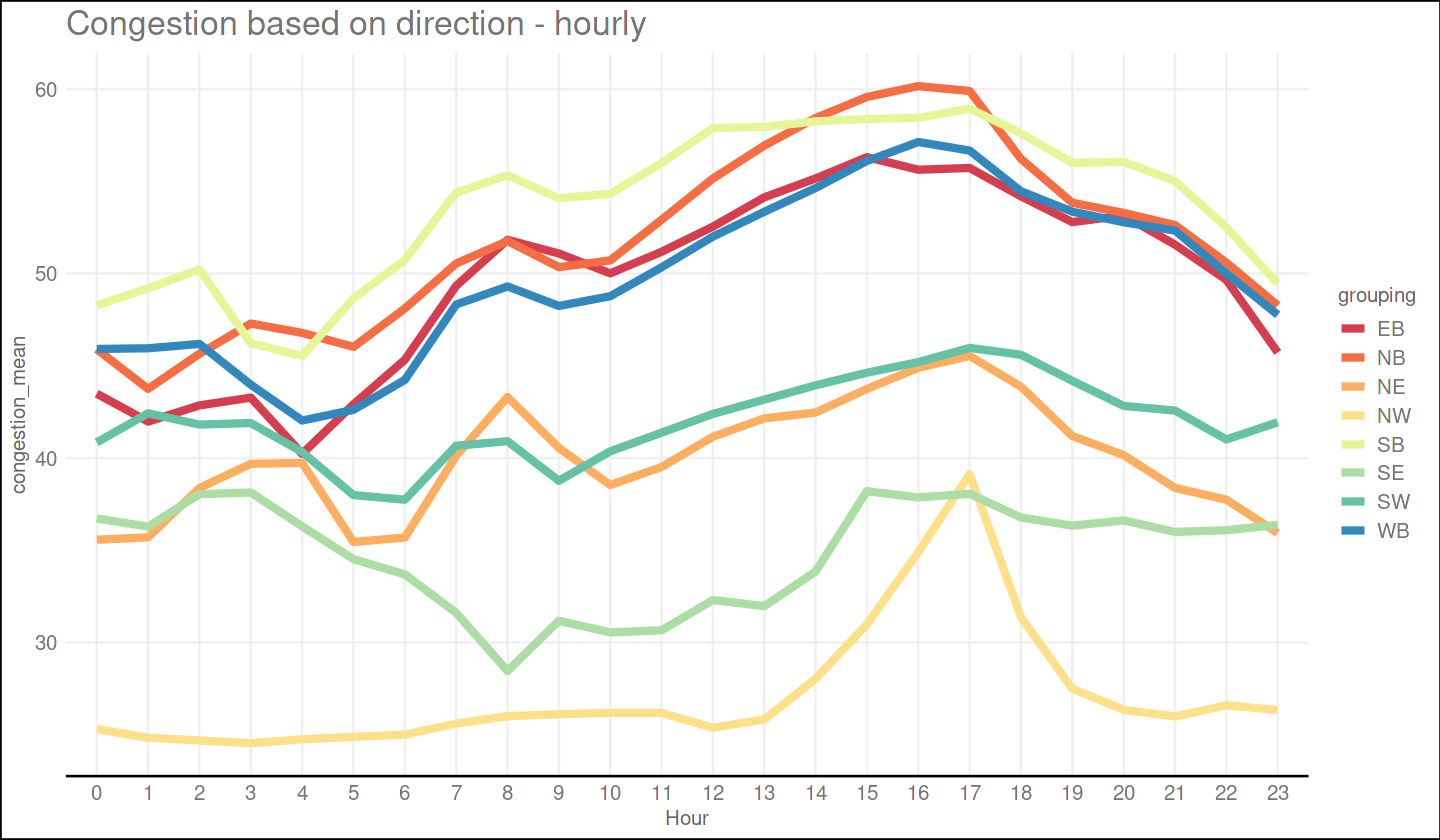

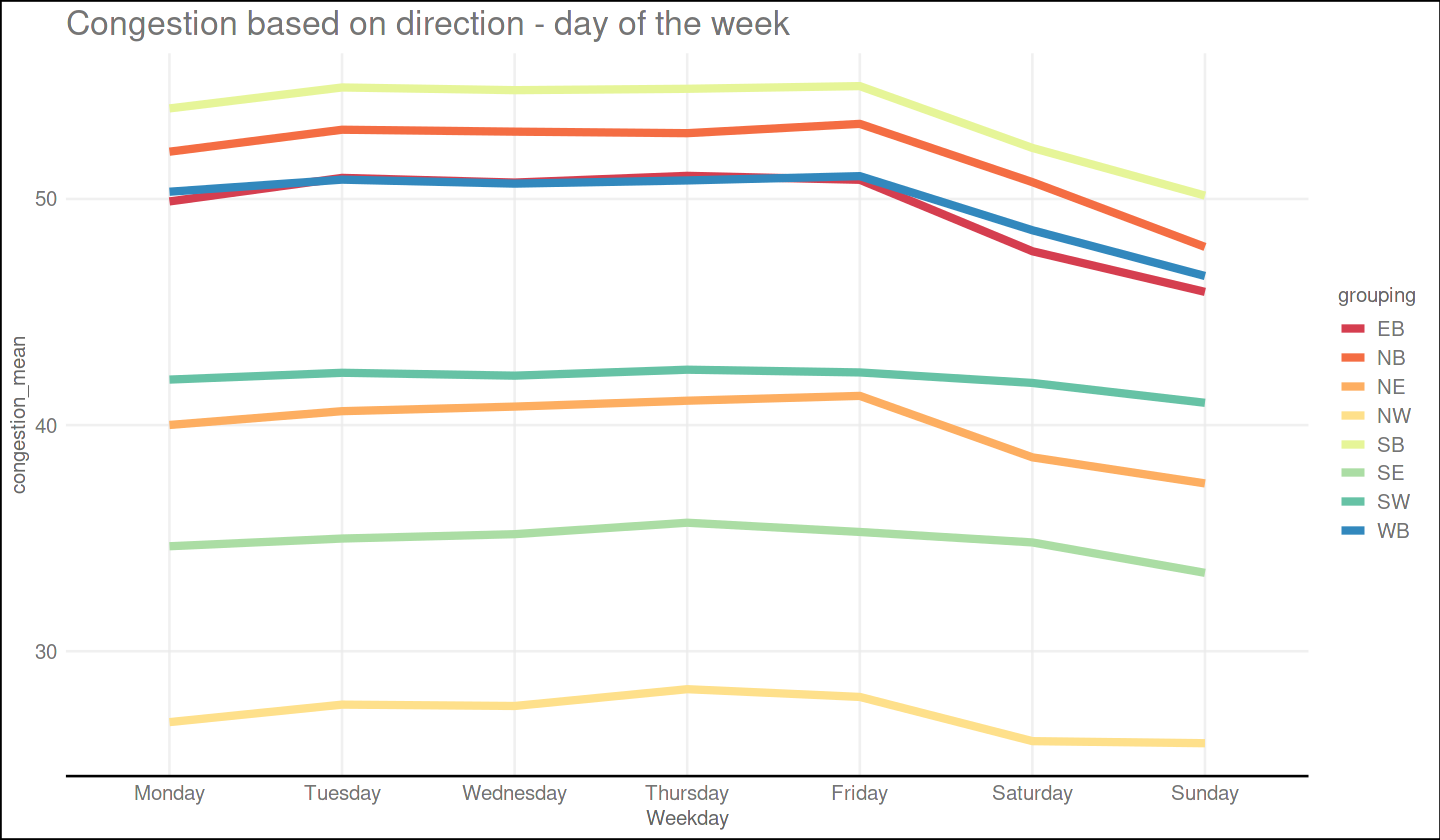

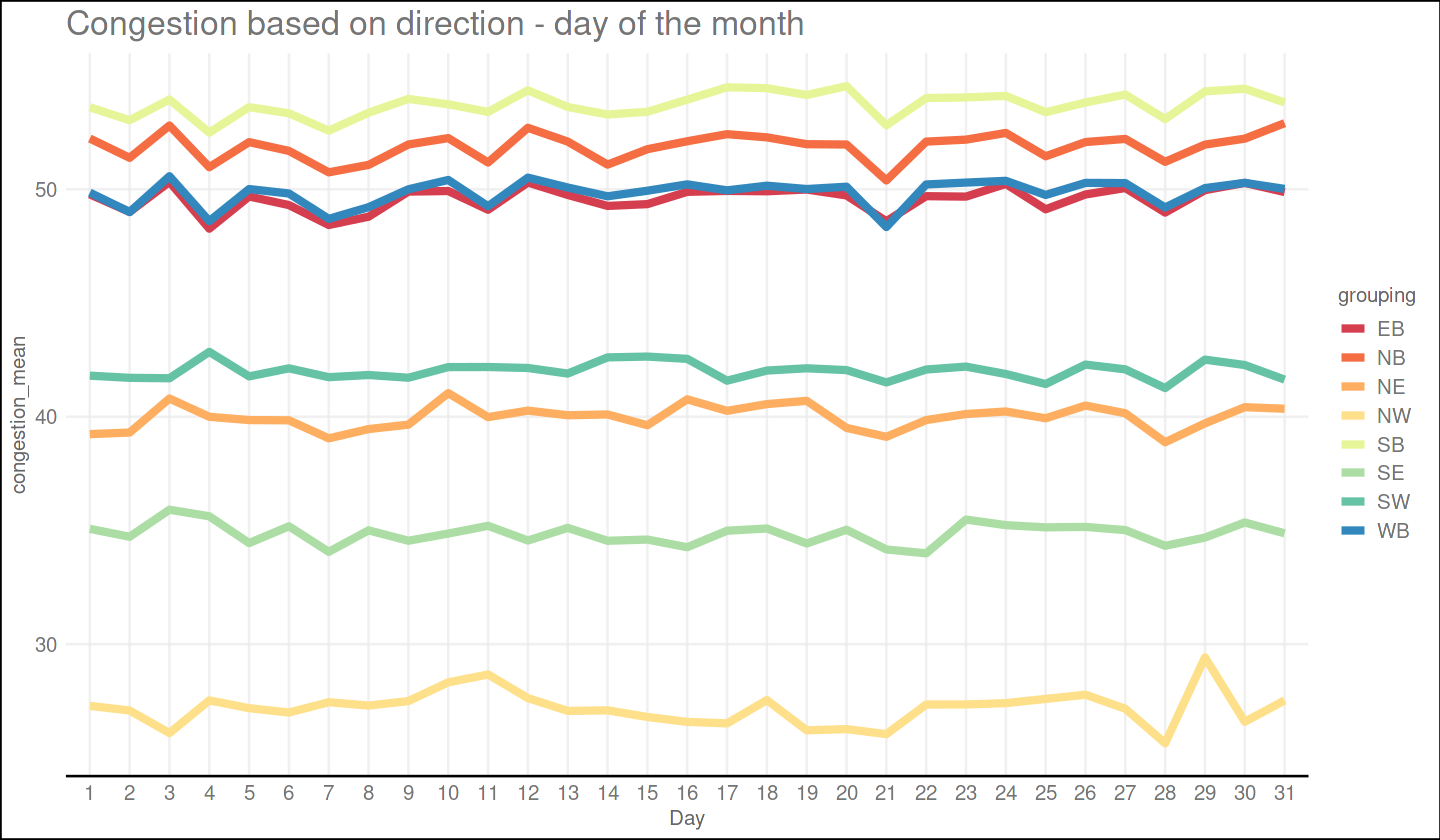

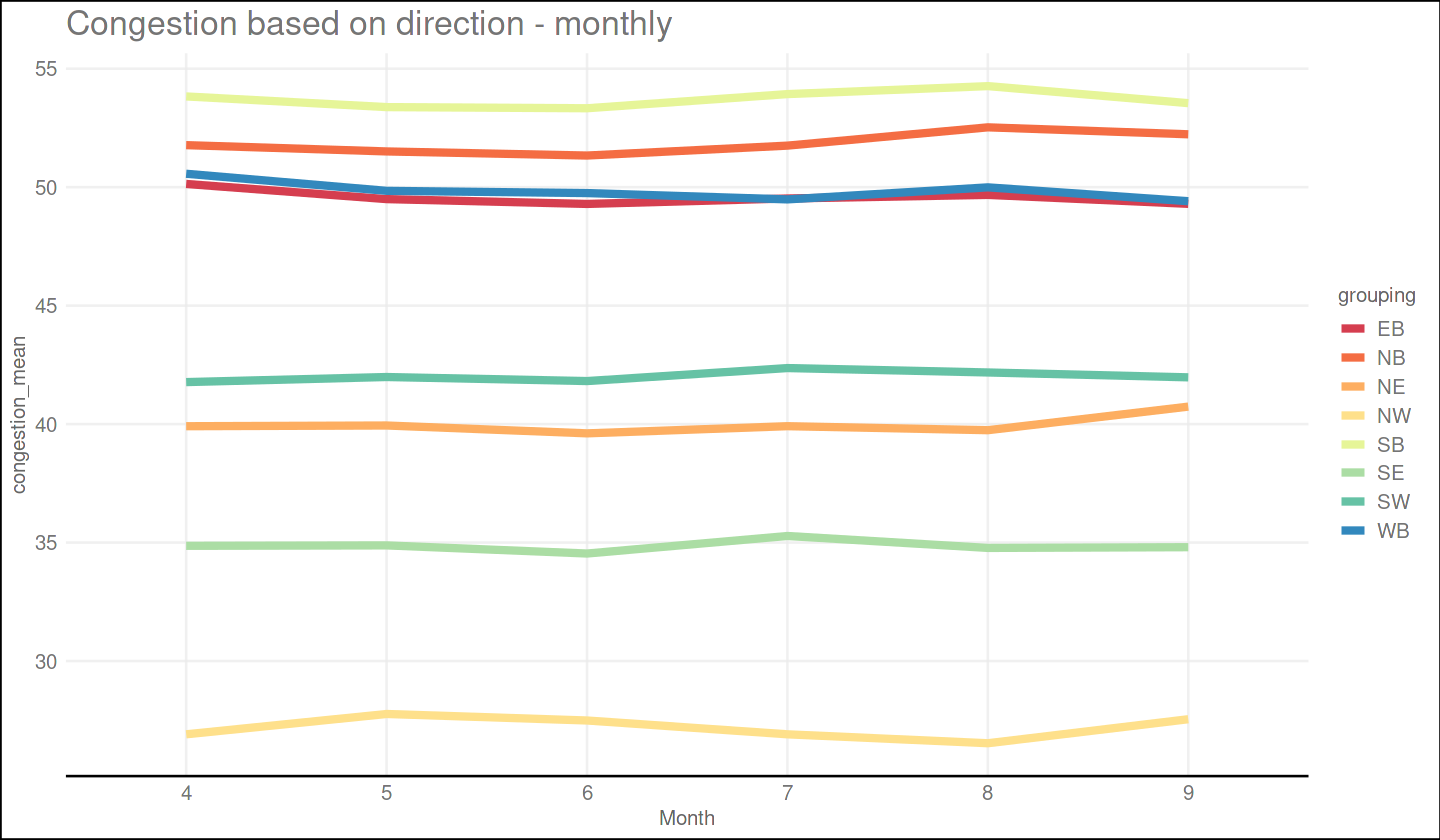

In [15]:
#Creating plots based on directions

grouping_plotter(df_train[, -c(1:2)],
                             group_list = list(c(0,1,2), c(0,1,2,3), c("EB", "NB", "SB", "WB", "NE", "SW", "NW", "SE")),
                             groupby_time = c("hour"), groupdistinct = c("direction")) + ggtitle("Congestion based on direction - hourly")

grouping_plotter(df_train[, -c(1:2)],
                             group_list = list(c(0,1,2), c(0,1,2,3), c("EB", "NB", "SB", "WB", "NE", "SW", "NW", "SE")),
                             groupby_time = c("weekday"), groupdistinct = c("direction")) + ggtitle("Congestion based on direction - day of the week")

grouping_plotter(df_train[, -c(1:2)],
                             group_list = list(c(0,1,2), c(0,1,2,3), c("EB", "NB", "SB", "WB", "NE", "SW", "NW", "SE")),
                             groupby_time = c("day"), groupdistinct = c("direction")) + ggtitle("Congestion based on direction - day of the month")

grouping_plotter(df_train[, -c(1:2)],
                             group_list = list(c(0,1,2), c(0,1,2,3), c("EB", "NB", "SB", "WB", "NE", "SW", "NW", "SE")),
                             groupby_time = c("month"), groupdistinct = c("direction")) + ggtitle("Congestion based on direction - monthly")

'Bound', single directions are clearly separated from the rest. They follow similiar trends and have similiar values.

* Congestion throughout the day - generally starts to rise starting at 6 am and peaks at 17 pm. Congestion mean for the 'NW' direction experiences a huge soar from 13 pm to 17 pm.

* Congestion throughout the week - for Monday it seems to be the lowest for all directions, understandably beat only by the weekend.

* Congestion throughout the month - there are no clearly visible trends and any end-of-month effect aren't that apparent.

* Congestion throughout  the year - again, no visible trends and congestion mean doesn't really fluctuate.

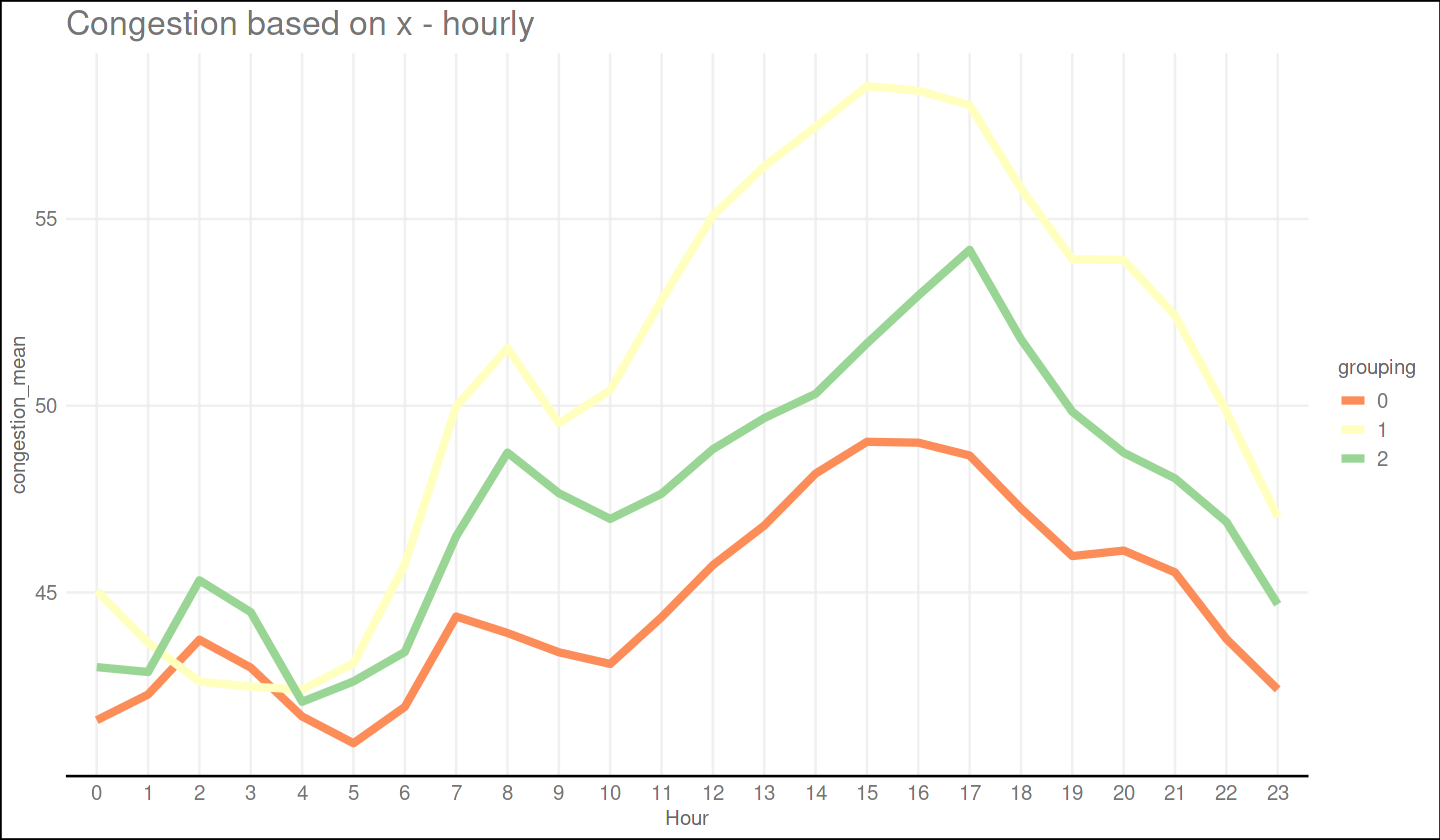

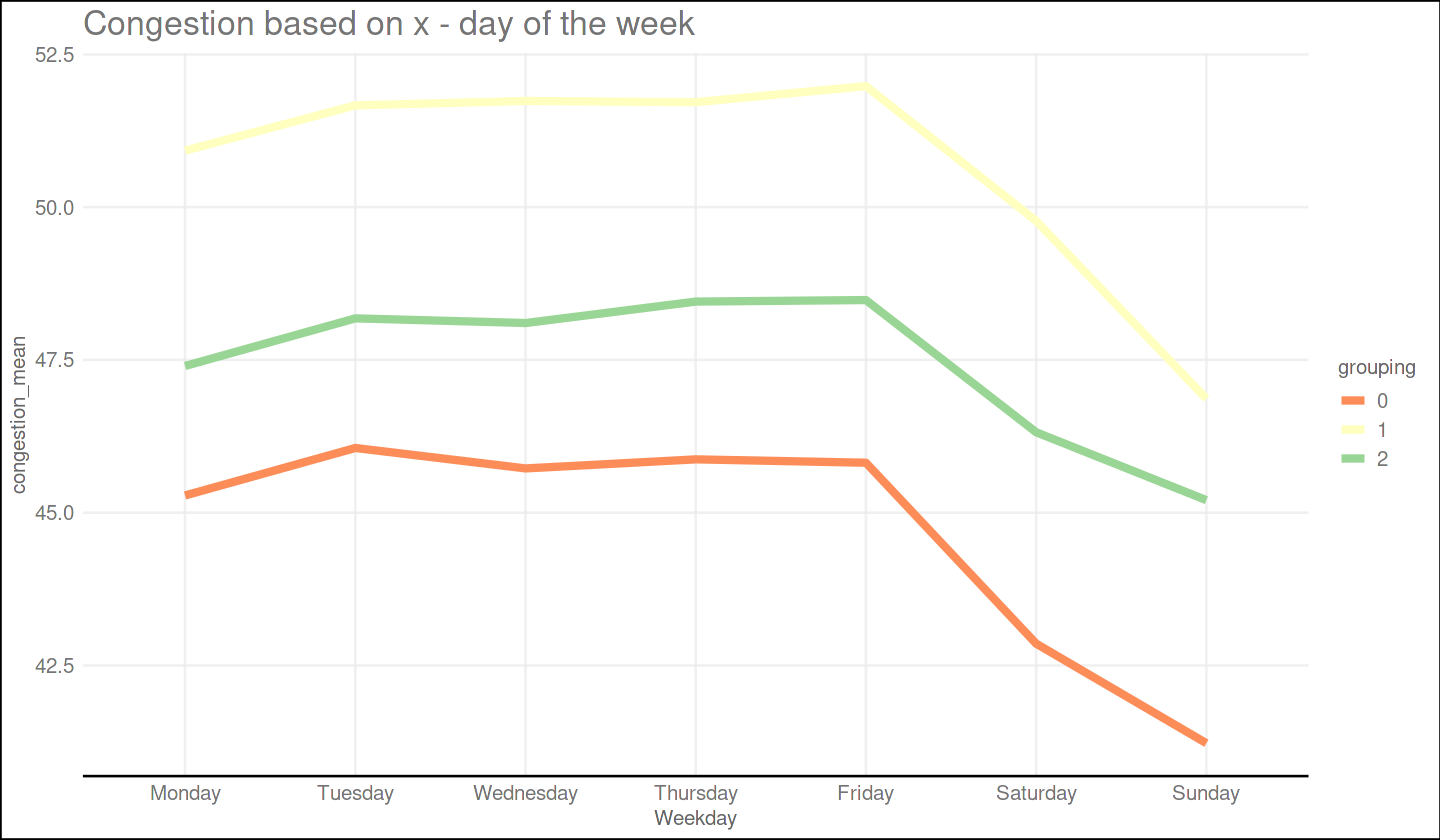

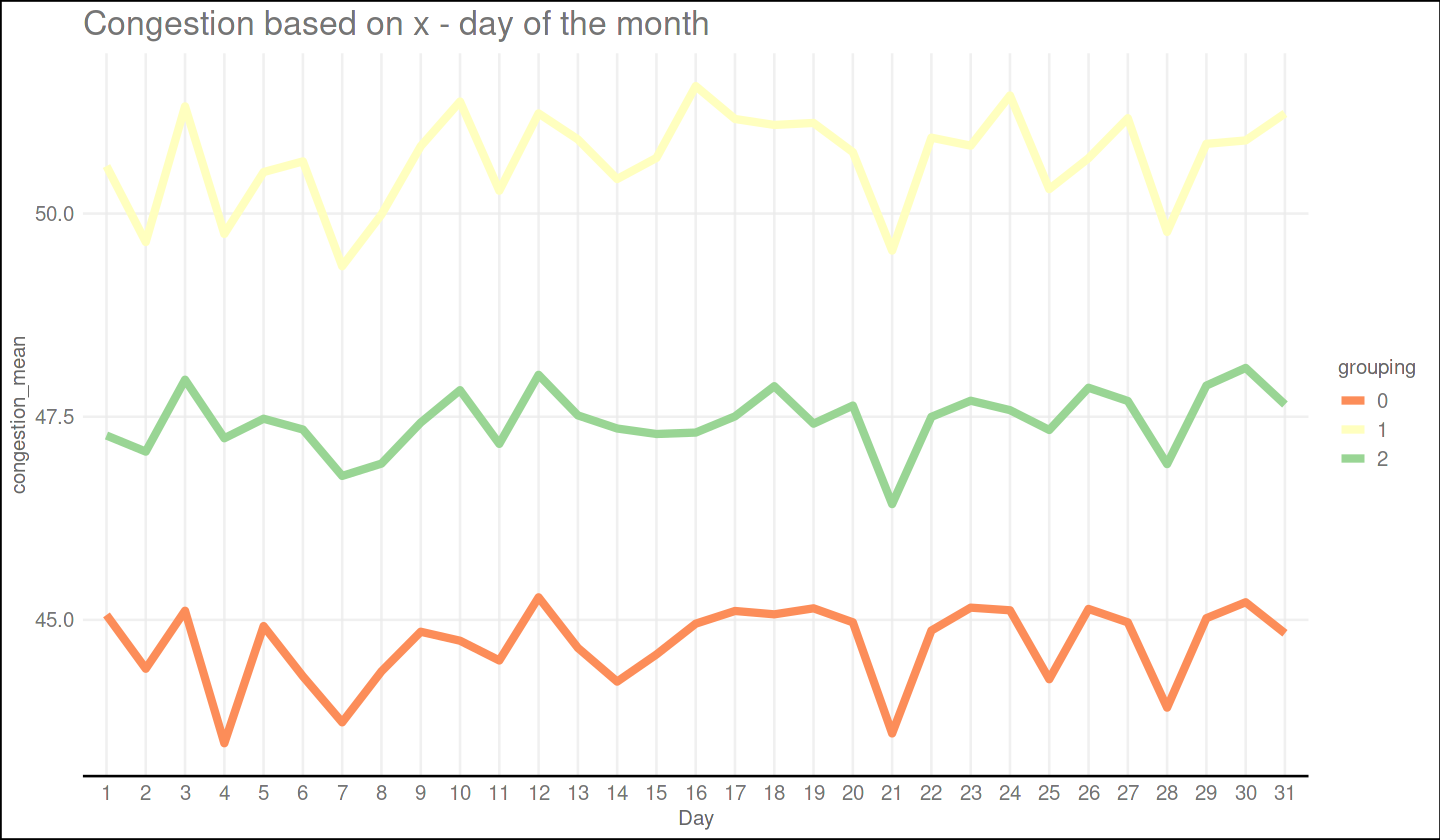

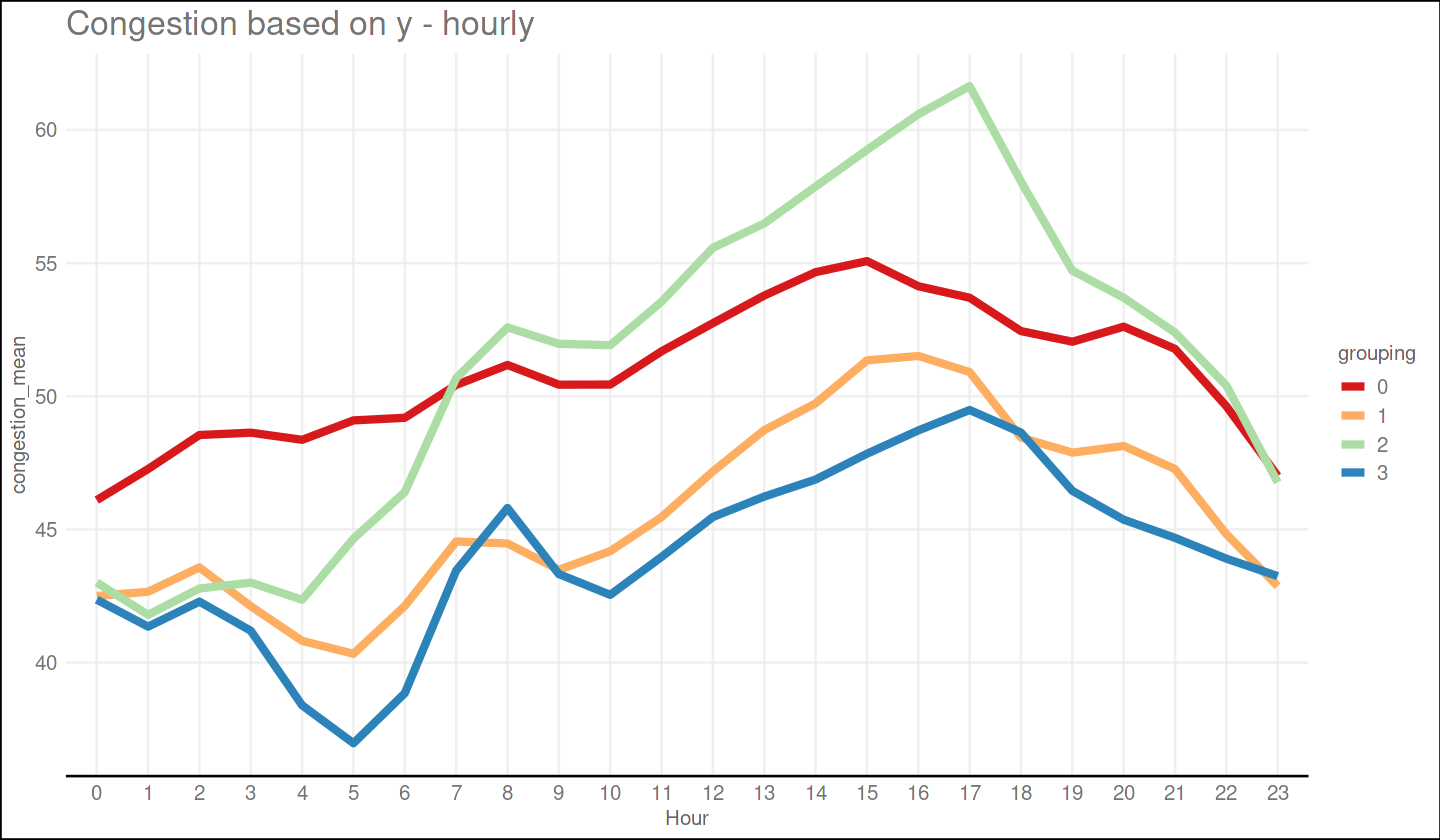

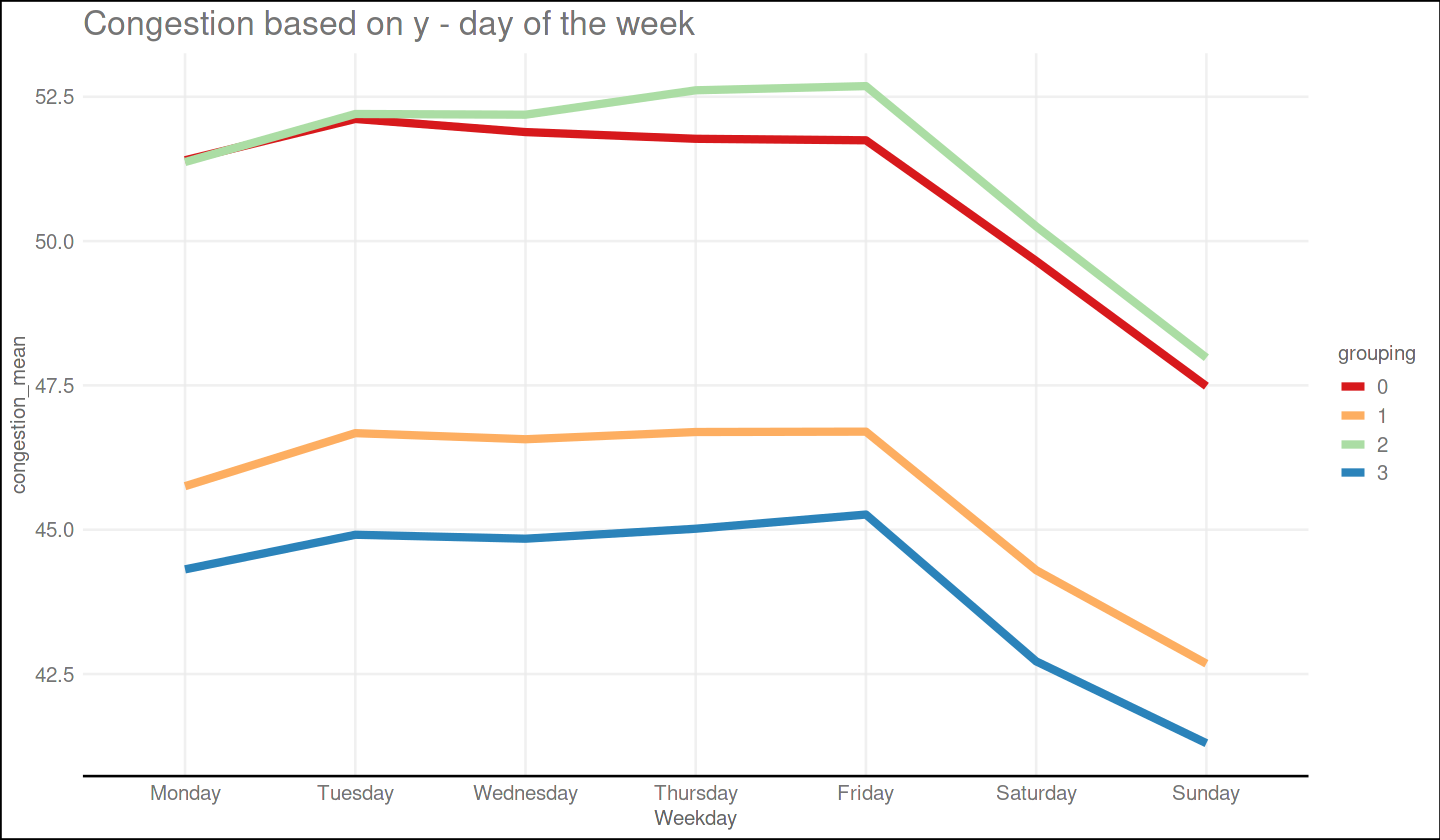

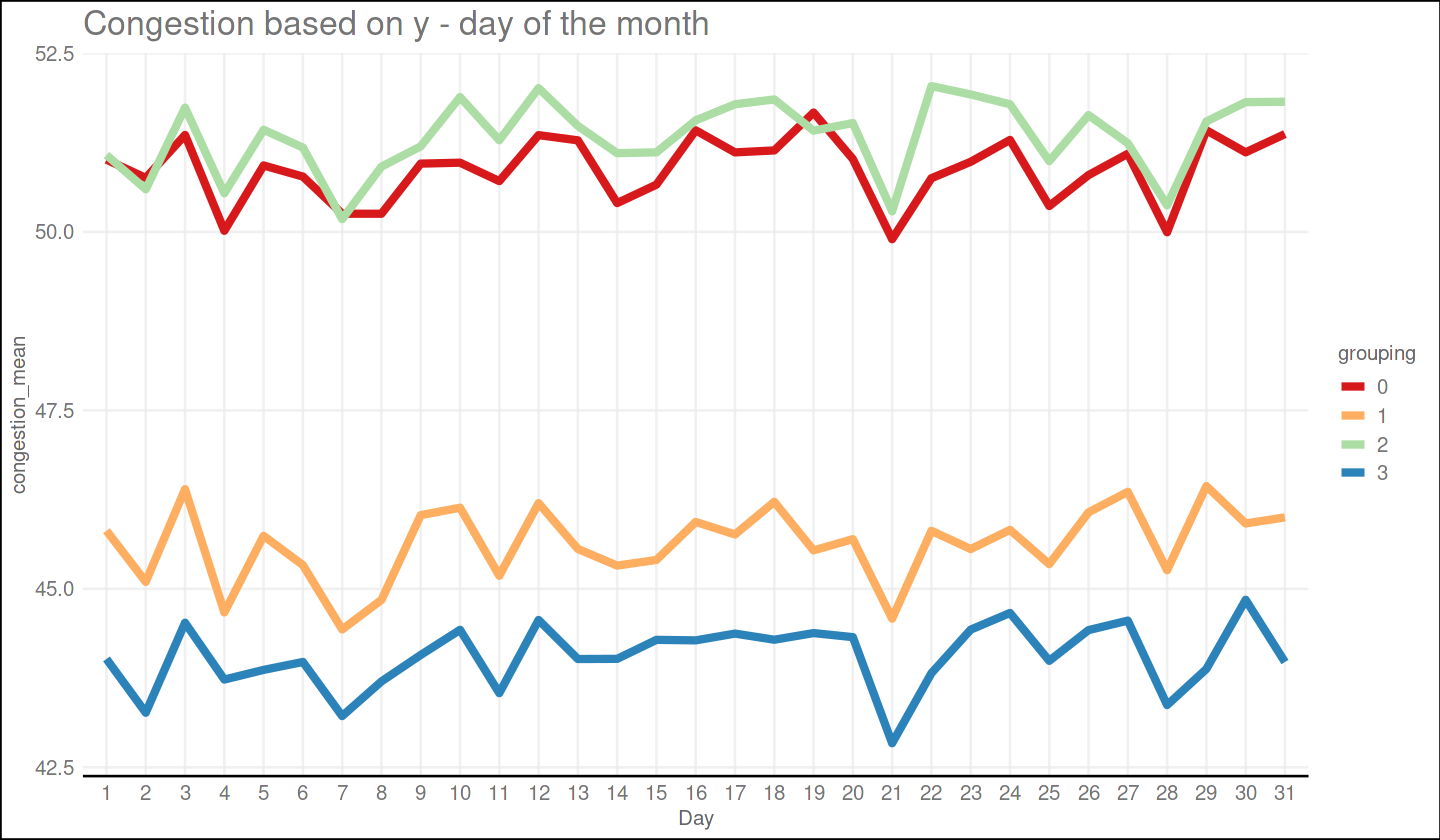

In [16]:
#Creating plots based on x
grouping_plotter(df_train[, -c(1:2)],
                             group_list = list(c(0,1,2), c(0,1,2,3), c("EB", "NB", "SB", "WB", "NE", "SW", "NW", "SE")),
                             groupby_time = c("hour"), groupdistinct = c("x")) + ggtitle("Congestion based on x - hourly")
grouping_plotter(df_train[, -c(1:2)],
                             group_list = list(c(0,1,2), c(0,1,2,3), c("EB", "NB", "SB", "WB", "NE", "SW", "NW", "SE")),
                             groupby_time = c("weekday"), groupdistinct = c("x")) + ggtitle("Congestion based on x - day of the week")

grouping_plotter(df_train[, -c(1:2)],
                             group_list = list(c(0,1,2), c(0,1,2,3), c("EB", "NB", "SB", "WB", "NE", "SW", "NW", "SE")),
                             groupby_time = c("day"), groupdistinct = c("x")) + ggtitle("Congestion based on x - day of the month")



#Creating plots based on y
grouping_plotter(df_train[, -c(1:2)],
                             group_list = list(c(0,1,2), c(0,1,2,3), c("EB", "NB", "SB", "WB", "NE", "SW", "NW", "SE")),
                             groupby_time = c("hour"), groupdistinct = c("y")) + ggtitle("Congestion based on y - hourly")
grouping_plotter(df_train[, -c(1:2)],
                             group_list = list(c(0,1,2), c(0,1,2,3), c("EB", "NB", "SB", "WB", "NE", "SW", "NW", "SE")),
                             groupby_time = c("weekday"), groupdistinct = c("y")) + ggtitle("Congestion based on y - day of the week")

grouping_plotter(df_train[, -c(1:2)],
                             group_list = list(c(0,1,2), c(0,1,2,3), c("EB", "NB", "SB", "WB", "NE", "SW", "NW", "SE")),
                             groupby_time = c("day"), groupdistinct = c("y")) + ggtitle("Congestion based on y - day of the month")

Means of congestion for **x** and **y** coordinates look almost the same when it comes to trends they follow. There's a difference in the matter of which grouping tops which coordinate. For **x** '1' achieves the highest mean. For **y** it's '2'.


Now to extract more specific information.

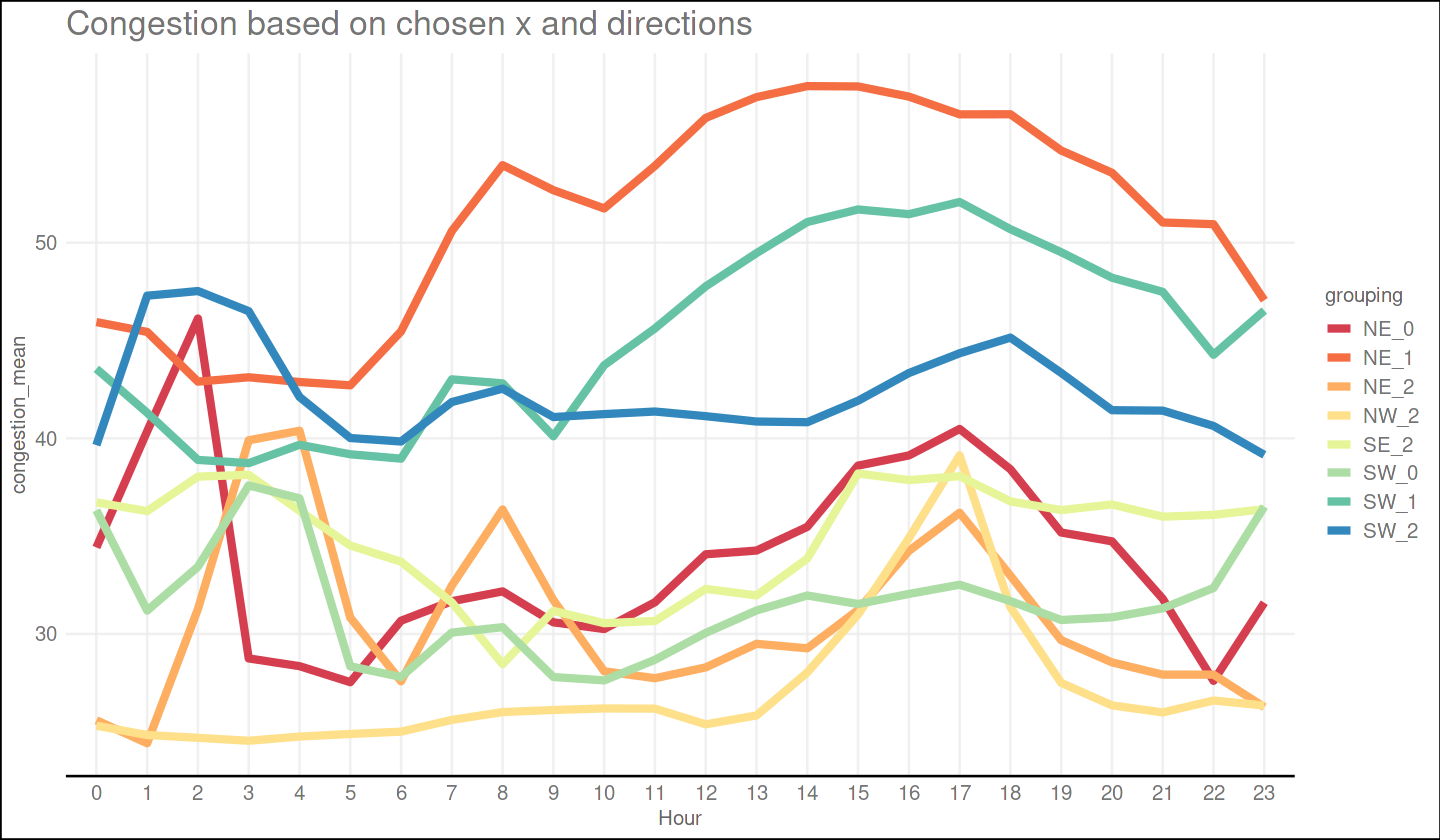

In [17]:
#Selecting 'mixed' directions and removing x = 2 coordinate before grouping
grouping_plotter(df_train[, -c(1:2)],
                             group_list = list(c(0,1,2), c(0,1,2,3), c("NE", "SW", "NW", "SE")),
                             groupby_time = c("hour"), groupdistinct = c("direction", "x")) + ggtitle("Congestion based on chosen x and directions")

Directions grouped up by x only accentuate the relations between those variables. NW_2 looks the same as typical NW because it only exists when **x = 2**.

# Preparing data for forecasting

The data can be treated as 65 univariate time series based on the combination of **x**, **y** and **direction**. 

**Cleaner of *dummy_cols* function**

In [18]:
dummy_cols_cleaner <- function(df, which_col) {


for(i in which_col) {
dummy_start <- length(df) + 1

    

#Saving the column name
character_name <- colnames(df)[i]

#Making dummy cols
    df <- df %>%
    mutate(dummy_cols(df[, i]))


#Fixing colnames
colnames(df)[dummy_start:length(df)] <- str_replace(colnames(df)[dummy_start:length(df)], ".data_", as.character(character_name))

}


#Removing column(s) that got one-hot encoded
df <- df[, -which_col]
    
return(df)
}

Creating a grouping variable - uniting **x**, **y** and **direction**.

In [19]:
#Preparing columns for joining them
df_train <- df_train %>%
    mutate(across(c(3:5), as.character))

#Joining x,y and direction
df_train <- unite(df_train, c(x,y,direction), col = route, remove = TRUE)

#Changing united columns to 'factor'
df_train <- df_train %>%
    mutate(route = as.factor(route))

**Adding means, medians and other statistics**

Making an 'add_stats' function.

In [20]:
#Adding various means, medians and other statistics
add_stats <- function(df) {
df <- df %>%
    group_by(route,minute,hour, weekday) %>%
    mutate(hour_minute_median = median(congestion),
           hour_minute_mean = mean(congestion),
           hour_minute_q1 = quantile(congestion)[2],
           hour_minute_q2 = quantile(congestion)[3],
           hour_minute_q3 = quantile(congestion)[4]) %>%
    ungroup()

df <- df %>%
    group_by(route,minute,hour,day) %>%
      mutate(hour_minute_day_median = median(congestion),
           hour_minute_day_mean = mean(congestion),
           hour_minute_day_q1 = quantile(congestion)[2],
           hour_minute_day_q2 = quantile(congestion)[3],
           hour_minute_day_q3 = quantile(congestion)[4]) %>%
    ungroup()

df <- df %>%
        group_by(route,minute,hour, weekday, month) %>%
      mutate(hour_minute_month_median = median(congestion),
           hour_minute_month_mean = mean(congestion),
           hour_minute_month_q1 = quantile(congestion)[2],
           hour_minute_month_q2 = quantile(congestion)[3],
           hour_minute_month_q3 = quantile(congestion)[4]) %>%
    ungroup()
    
    return(df)   
}

# Comparing models and statistics using validation data

Function that creates a validation set while also filling needed statistics.

In [21]:
create_val <- function(df, val_days, val_months, test = NULL) {
    
    
if(!missing(test)) {
    df_val <- test
    
    df <- add_stats(df)

#Separating daily statistics and grouping variables
    
#Isolating 'daily' data
df_filtered <- df %>%
    filter(as.numeric(month) == 6) %>% #June is chosen for the lowest number of missing rows
    filter(as.numeric(day) == 30)

  
df_filtered <- df_filtered[, c(3,5,6,7,15:19)]


df_val <- df_val %>%
    left_join(df_filtered, by = c('route', 'minute','hour','day'))

#Isolating 'monthly-weekday' data
df_filtered <- df %>%
    filter(as.numeric(month) == 9)

df_filtered <- df_filtered[, c(3,5,6,8,9,20:24)]

df_val <- df_val %>%
    left_join(df_filtered, by = c('route', 'minute', 'hour', 'weekday', 'month'))

df_val <- df_val %>%
    distinct()


#Isolating 'weekday' data
df_filtered <- df[, c(3,5,6,9,10:14)]

df_val <- df_val %>%
    left_join(df_filtered, by = c('route', 'minute', 'hour', 'weekday'))

df_val <- df_val %>%
    distinct()
}
    

else if(missing(test)) {
    
#Isolating monthly data
df_val <- df %>%
    filter(as.numeric(month) == val_months)

df_val_length <- length(df_val)
    
#Isolating daily / weekday data  
#If the 'val_days' argument is a vector, it relates to a weekday
    if(df_val_length <= 1) {
       df_val <- df_val %>%
            filter(weekday == val_days) %>%
            filter(as.numeric(day)>=24)
        }
    
    else {
        df_val <- df_val %>%
            filter(as.numeric(day) %in% val_days)
    }

df <- df[1:min(df_val$row_id), ]
        
df <- add_stats(df)

#Separating daily statistics and grouping variables
    
#Isolating 'daily' data
df_filtered <- df %>%
    filter(as.numeric(month) == 6) %>% #June is chosen for the lowest number of missing rows
    filter(as.numeric(day) %in% val_days)

  
df_filtered <- df_filtered[, c(3,5,6,7,15:19)]


df_val <- df_val %>%
    left_join(df_filtered, by = c('route', 'minute','hour','day'))

#Isolating 'monthly-weekday' data
df_filtered <- df %>%
    filter(as.numeric(month) == val_months)

df_filtered <- df_filtered[, c(3,5,6,8,9,20:24)]

df_val <- df_val %>%
    left_join(df_filtered, by = c('route', 'minute', 'hour', 'weekday', 'month'))

df_val <- df_val %>%
    distinct()


#Isolating 'weekday' data
df_filtered <- df[, c(3,5,6,9,10:14)]

df_val <- df_val %>%
    left_join(df_filtered, by = c('route', 'minute', 'hour', 'weekday'))

df_val <- df_val %>%
    distinct()

                      }
    

return(df_val)
                                }

# Bayesian Structural Time Series Model (BSTS)

Explanation of the basics [here](https://www.unofficialgoogledatascience.com/2017/07/fitting-bayesian-structural-time-series.html). Functions, paramaters and package capabilities [here](https://cran.r-project.org/web/packages/bsts/bsts.pdf).


Data is split into 65 univariate time series using 'route' variable. After being split into a list, single data frames are converted into 'xts' objects for modelling. Seasonality and 1 autoregressive term are used to explain congestion.

In [22]:
bsts_model <- function(df, df_val) {


    
#Excluding the validation set from the training data
df <- df[1:min(min(df_val$row_id),nrow(df)), ]

df <- add_stats(df)

#Removing date related variables
df <- df %>%
   dplyr::select(-c(minute,hour,day,month,row_id, weekday))

df_val <- df_val %>%
    dplyr::select(-c(minute,hour,day,month,row_id, weekday))


    

#Splitting data into lists
df_list <- df %>%
    group_split(route)
    
    
val_list <- df_val %>%
    group_split(route)

pred_df <- data.frame(id = 1:nrow(as.data.frame(val_list[[1]])))

    xts_maker <- function(df) {
    df_xts <- xts(df[, -1], order.by = as.POSIXct(df[, 1], origin = "1970-01-01"))
    
    return(df_xts)
}
    
    

    
for(i in 1:65) {
    my_data <- as.data.frame(df_list[[i]])
    val_data <- as.data.frame(val_list[[i]])
    
my_data <- my_data %>%
    dplyr::select(-route) %>%
    mutate(congestion = as.numeric(congestion))

if(length(val_data) == length(my_data)){
val_congestion <- as.numeric(val_data$congestion)

val_data <- val_data %>%
    dplyr::select(-c(route, congestion))
}
    
else {
    val_data <- val_data %>%
        dplyr::select(-route)
}

my_data <- xts_maker(my_data)
val_data <- xts_maker(val_data)

#Listing specifications

train_sd <- sd(my_data$congestion)
level_guess <- 0.006
    sigma.prior <- SdPrior(sigma.guess = level_guess * train_sd,
                                             upper.limit = train_sd)
    
    
val_level <- AddLocalLevel(list(), as.numeric(my_data$congestion)
                           ,sigma.prior = sigma.prior)

val_level_season <- AddSeasonal(val_level, as.numeric(my_data$congestion),
                        nseasons = 24, season.duration = 3) #Daily seasonality
val_level_season_weekly <- AddSeasonal(val_level_season, as.numeric(my_data$congestion), nseasons = 7, season.duration = 72) #Weekly seasonality

val_level_ar <- AddAr(val_level_season_weekly, as.numeric(my_data$congestion), lags = 1) #Autoregressive term for first lag
    
val_model <- bsts(congestion ~.,
                     state.specification = val_level_ar,
                     data = my_data,
                     niter = 100,
                     seed = 1918)
    

#Model predictions on validation set
val_pred <- predict(val_model, newdata = val_data,
                            horizon = nrow(val_data))
    
pred_df <- pred_df %>%
    cbind(val_pred$mean)
 
}
pred_df <- pred_df[, -1]

    colnames(pred_df) <- unique(df$route)
    
plot(val_model, "coef")
    
return(pred_df)
    }

# Gradient boosted trees

**Finding better parameters with a grid search**

In [23]:
#dataset = data.frame object, model = h2o4gpu classifier model
#params = list of n parameter arrays
#k - number of folds; if NULL, k = 10, which_fold - setting a seed to check on the same fold; if NULL, last fold is chosen

h2o4gpu_grid_search <- function(dataset, params, k, which_fold) {

#Dataset split
if(missing(k) || (is.null(k))) {
    k_grid <- 10
}

else if(!missing(k))
k_grid <- k

if(missing(which_fold) || (is.null(which_fold))) 
sampled_k <- k_grid
    

else if(!missing(which_fold))
sampled_k <- which_fold    

holdout_rows <- c(((sampled_k-1)*floor((nrow(dataset)/k_grid))+1):((floor(nrow(dataset)/k_grid))*sampled_k)+nrow(dataset)%%k_grid)
    

df_grid <- data.frame(learning_rate = 0, n_estimators = 0, max_depth = 0, colsample_bytree = 0, subsample = 0, mae = 0) 
    

        gb_learning_rate <- params[[1]]
        gb_n_estimators <- params[[2]]
        gb_max_depth <- params[[3]]
        gb_colsample_bytree <- params[[4]]
        gb_subsample <- params[[5]]


    
#Brute grid search loops
for(i in gb_learning_rate) {
    for(j in gb_n_estimators) {
      for(k in gb_max_depth) {
        for(l in gb_colsample_bytree){
          for(n in gb_subsample) {
        
    gb_model_class <- h2o4gpu.gradient_boosting_regressor(loss = "ls", learning_rate = i,
                      n_estimators = j, subsample = n, criterion = "friedman_mse",
                      max_depth = k, max_features = "auto",
                      colsample_bytree = l, tree_method = "gpu_hist",
                      predictor = "gpu_predictor", objective = "reg:linear",
                      booster = "gbtree",
                      backend = "h2o4gpu") %>% fit(dataset[-holdout_rows, -length(dataset)],
                                                   dataset[[length(dataset)]][-holdout_rows])
                                                   
              
        df_grid <- df_grid %>%
          rbind(c(i,j,k,l, n,
                  as.numeric(Metrics::mae(predict(gb_model_class, dataset[holdout_rows, -length(dataset)]),
                                          dataset[[length(dataset)]][holdout_rows]))))
                                  }
                                 }
                                }
                               }
                              }
  
    df_grid <- df_grid %>%
       arrange(mae) %>%
       head(10)
 

return(df_grid)
}

Grid search results for a 50 fold 50th fold and 10 folds 10th fold splits.


| kfolds / which_fold | learning_rate | n_estimators | max_depth | colsample_bytree | mae |
| --- | --- | --- | --- | --- | --- |  
| 50 / 50 | 0.15 | 250 | 9 | 1 | 5.060246 |
| 50 / 50 | 0.15 | 200 | 8 | 1 | 5.071551 |

| kfolds / which_fold | learning_rate | n_estimators | max_depth | colsample_bytree | mae |
| --- | --- | --- | --- | --- | --- |  
| 10 / 10 | 0.15 | 250 | 8 | 0.75 | 4.709383 |
| 10 / 10 | 0.15 | 200 | 8 | 1 | 4.712847 |

Models were evaluated by sampling September's last week. BSTS showed overall poor results, either due to modelling errors or wrong parameters.

# Making predictions

**Preparing test data**

In [24]:
#Preparing columns for joining them
df_test <- df_test %>%
    mutate(across(c(3:5), as.character))

#Joining x,y and direction
df_test <- unite(df_test, c(x,y,direction), col = route, remove = TRUE)

#Changing united columns to 'factor'
df_test <- df_test %>%
    mutate(route = as.factor(route))

**Adding statistics to the test data.**

In [25]:
df_test <- create_val(df_train, 30, 9, df_test)

**Predicting with the usage of gb model.**

In [26]:
df_gb <- df_train

df_gb <- add_stats(df_gb)

#Removing row_id and time related variables (to improve mae)
df_gb <- df_gb %>%
    dplyr::select(-c(1,2,5,6,7,8,9))
    
#One hot encoding categorical variables
df_gb <- dummy_cols_cleaner(df_gb, c(1))    


#Moving target variable to the last column
df_gb <- df_gb %>%
    mutate(congestion = as.numeric(congestion)) %>%
    dplyr::select(-congestion, congestion)

#Removing unneeded statistics
df_gb <- df_gb %>%
    dplyr::select(-c(3,5,6,8,9,11,12,13,14,15))

#Preparing test data
df_test <- df_test %>%
    dplyr::select(-c(1,2,4,5,6,7,8))

df_test <- dummy_cols_cleaner(df_test, c(1))
df_test <- df_test[, -16]

df_test <- df_test %>%
    dplyr::select(-c(3,5,6,8,9,11,12,13,14,15))

gb_model_class <- h2o4gpu.gradient_boosting_regressor(loss = "ls", learning_rate = 0.15,
                      n_estimators = 200, subsample = 1, criterion = "friedman_mse",
                      max_depth = 7, max_features = "auto",
                      colsample_bytree = 1, tree_method = "gpu_hist",
                      predictor = "gpu_predictor", objective = "reg:linear",
                      booster = "gbtree",
                      backend = "h2o4gpu") %>% fit(df_gb[, -length(df_gb)],
                                                   df_gb[[length(df_gb)]])

gb_predictions <- predict(gb_model_class, df_test)

**Final predictions mash-up.**

In [29]:
#Loading in the submission file
congestion_submission <- read.csv("../input/tabular-playground-series-mar-2022/sample_submission.csv")

final_congestion_test <- gb_predictions

congestion_submission$congestion <- final_congestion_test


write.csv(congestion_submission, "./congestion_test.csv", quote = FALSE, row.names = FALSE)